Import data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

DataLong1_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm139-datasets/main/syn_ts_ed_long.csv'
DataLarge1_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm139-datasets/main/syn_ts_ed_wide.csv'


In [3]:

long_df = pd.read_csv(DataLong1_URL)
long_df.head()

,date,hosp,attends
0,2014-04-01,1,331
1,2014-04-02,1,340
2,2014-04-03,1,316
3,2014-04-04,1,304
4,2014-04-05,1,292


In [4]:
long_df = pd.read_csv(DataLarge1_URL)
long_df.head()

,date,hosp_1,hosp_2,hosp_3,hosp_4
0,2014-04-01,331,287,195,184
1,2014-04-02,340,293,177,181
2,2014-04-03,316,249,183,192
3,2014-04-04,304,313,208,157
4,2014-04-05,292,291,218,166


In [5]:
def ed_data_to_wide(file_path):
    # column name transformation
    translated_names = {0:'hosp_1',
                        1:'hosp_2',
                        2:'hosp_3',
                        3:'hosp_4'}

    data_types = {'hosp_1':np.int64,
                  'hosp_2':np.int64,
                  'hosp_3':np.int64,
                  'hosp_4':np.int64}

    long_df = (pd.read_csv(file_path)
            .pivot_table(values=['attends'], index=['date'], columns=['hosp'])
            .T.reset_index(drop=True)
            .T.rename(columns=translated_names)
            .assign(date=lambda x: pd.to_datetime(x.index))
            .set_index('date')
            .astype(data_types)
         )

    return long_df
large_df = ed_data_to_wide(DataLong1_URL)
large_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275 entries, 2014-04-01 to 2014-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hosp_1  275 non-null    int64
 1   hosp_2  275 non-null    int64
 2   hosp_3  275 non-null    int64
 3   hosp_4  275 non-null    int64
dtypes: int64(4)
memory usage: 10.7 KB


In [6]:
large_df = ed_data_to_wide(DataLong1_URL)
large_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275 entries, 2014-04-01 to 2014-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hosp_1  275 non-null    int64
 1   hosp_2  275 non-null    int64
 2   hosp_3  275 non-null    int64
 3   hosp_4  275 non-null    int64
dtypes: int64(4)
memory usage: 10.7 KB


In [7]:
def ed_data_to_long(file_path):
    translated_names = {'hosp_':'attends'}
    data_types = {'hosp': np.int16, 'attends':np.int64}

    long_df = (
                pd.wide_to_long(pd.read_csv(file_path), stubnames='hosp_',
                                i=['date'], j='hosp')
                .reset_index()
                .rename(columns=translated_names)
                .assign(date=lambda x: pd.to_datetime(x['date']))
                .astype(data_types)
                )

    return long_df

In [8]:
long_df = ed_data_to_long(DataLarge1_URL)
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1100 non-null   datetime64[ns]
 1   hosp     1100 non-null   int16         
 2   attends  1100 non-null   int64         
dtypes: datetime64[ns](1), int16(1), int64(1)
memory usage: 19.5 KB


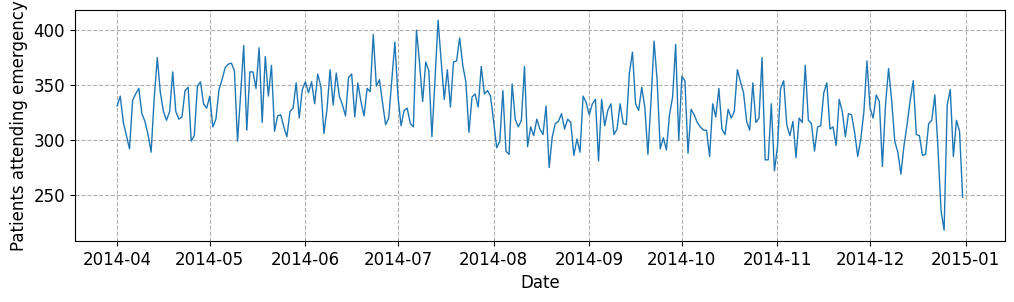

In [9]:
# example solution

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Patients attending emergency", fontsize=12)

_ = ax.plot(large_df['hosp_1'], lw=1)
# include x, y grid
_ = ax.grid(ls='--')

# set size of x, y ticks
_ = ax.tick_params(axis='both', labelsize=12)

# save the figure
fig.savefig('hosp_1_ed.png', dpi=300)

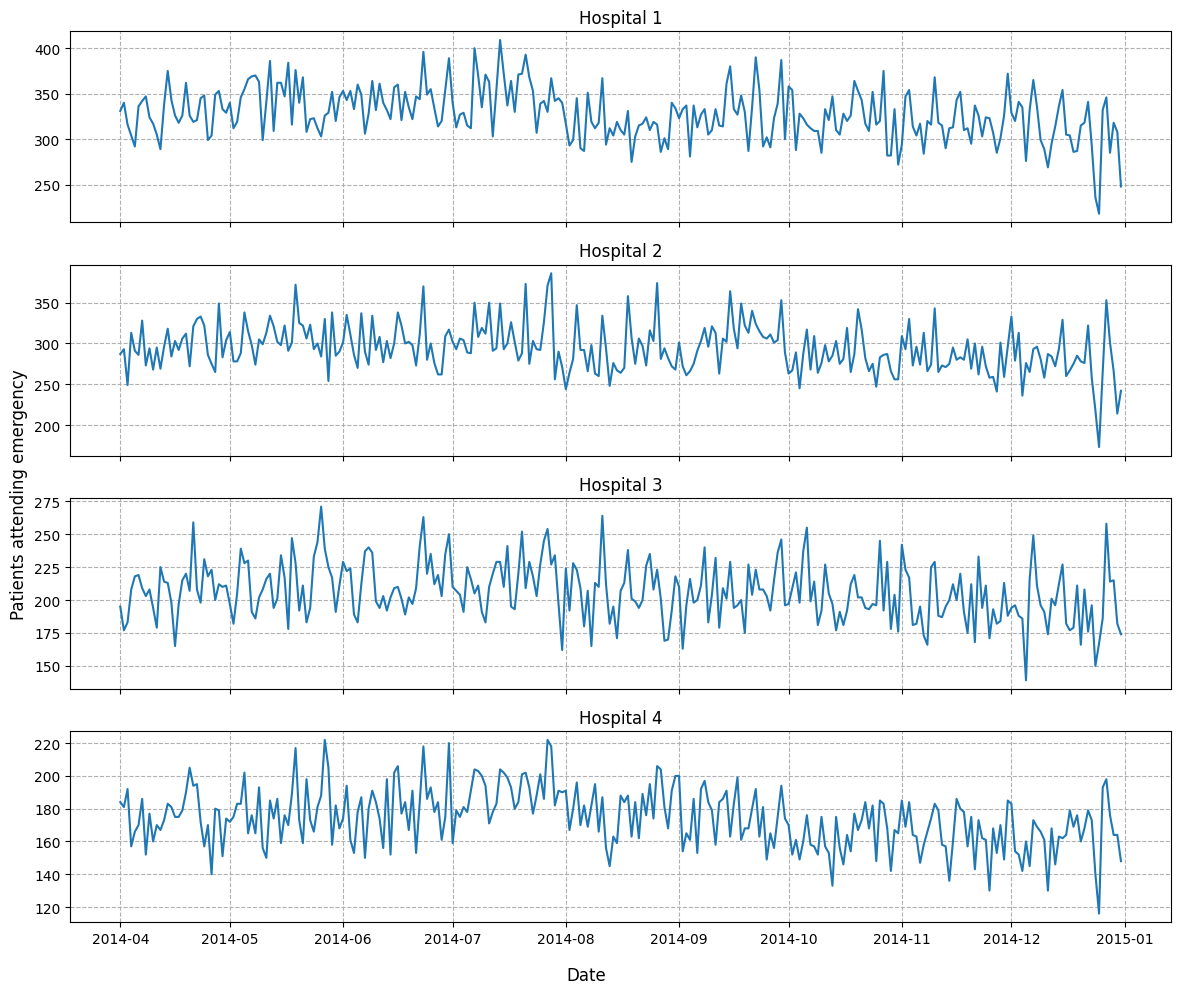

In [10]:

fig, axs = plt.subplots(nrows=4, ncols=1, tight_layout=True, figsize=(12,10),
                        sharex=True)

# note that axis is a 2D array
FS_SUBTITLE = 12
for hosp_idx in range(0,4):
    _ = axs[hosp_idx].plot(large_df[f'hosp_{hosp_idx+1}'])
    _ = axs[hosp_idx].set_title(f'Hospital {hosp_idx+1}', fontsize=FS_SUBTITLE)
    _ = axs[hosp_idx].grid(ls='--')

# axis labels matplotlib
AXIS_LABEL_SIZE = 12
_ = fig.supylabel('Patients attending emergency', fontsize=AXIS_LABEL_SIZE)
_ = fig.supxlabel('Date', fontsize=AXIS_LABEL_SIZE)

In [11]:
hospital_ref_mapping = {1: '230', 2: '240', 3: '250', 4: '260'}
long_df['hospital_ref'] = long_df['hosp'].map(hospital_ref_mapping)

# Afficher les 5 premières lignes pour vérifier
print(long_df)

           date  hosp  attends hospital_ref
0    2014-04-01     1      331          230
1    2014-04-02     1      340          230
2    2014-04-03     1      316          230
3    2014-04-04     1      304          230
4    2014-04-05     1      292          230
...         ...   ...      ...          ...
1095 2014-12-27     4      198          260
1096 2014-12-28     4      176          260
1097 2014-12-29     4      164          260
1098 2014-12-30     4      164          260
1099 2014-12-31     4      148          260

[1100 rows x 4 columns]


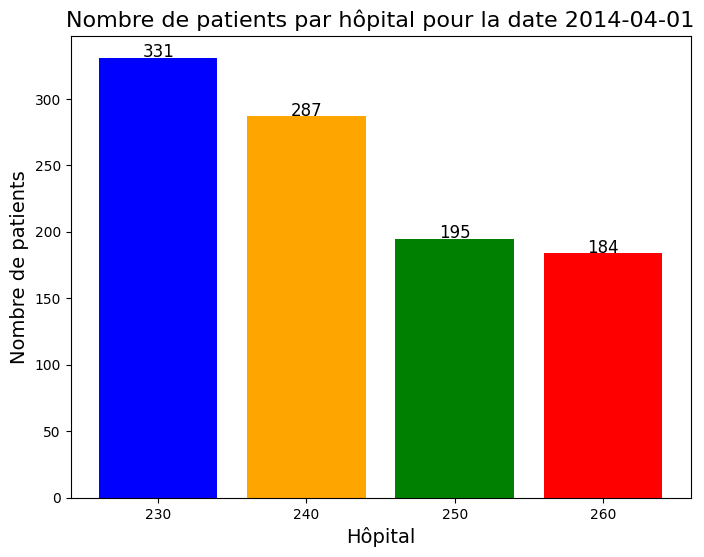

In [12]:
specific_date = '2014-04-01'
filtered_df = long_df[long_df['date'] == specific_date]

# Agréger les données pour obtenir le nombre de patients pour chaque hôpital à cette date
hospital_attends_sum = filtered_df.groupby('hospital_ref')['attends'].sum()

# Créer un histogramme pour représenter le nombre de patients par hôpital pour la date donnée
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(hospital_attends_sum.index, hospital_attends_sum.values, color=['blue', 'orange', 'green', 'red'])

# Ajouter des étiquettes et le titre
ax.set_title(f'Nombre de patients par hôpital pour la date {specific_date}', fontsize=16)
ax.set_xlabel('Hôpital', fontsize=14)
ax.set_ylabel('Nombre de patients', fontsize=14)

# Afficher les valeurs sur chaque barre
for i, value in enumerate(hospital_attends_sum.values):
    ax.text(i, value + 0.5, str(value), ha='center', fontsize=12)

plt.show()